In [1]:
import os
import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('E:/BBC/WP1/data/Code/python/BBC')
from source.source_helper import gen_montage
import base.files_in_out as files_in_out 
from base.files_in_out import GetFiles,filter_list
import base.base_constants as b_cs
import source.source_constants as cs
from mne.minimum_norm import make_inverse_operator, apply_inverse

['R/aware', 'R/unaware', 'R/inh', 'R/exh', 'R2/aware', 'R2/unaware', 'R2/inh', 'R2/exh', 'T/aware', 'T/unaware', 'T/inh', 'T/exh', 'T2/aware', 'T2/unaware', 'T2/inh', 'T2/exh']


# Co-registration
Has to be done once on raw object
        

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


/Users/leupinv/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/source/source_helper.py:34: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  dig_montage.plot(kind='3d')


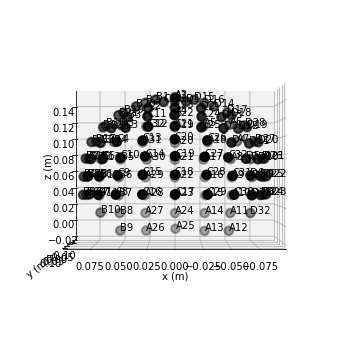

In [4]:
#generate montage based on realistic coordinates 
montage=gen_montage()

In [6]:
raw=mne.io.read_raw_fif('Z:/BBC/WP1/data/EEG/tsk/raw/g01/g01_n_tsk_ds_eeg-raw.fif')


Opening raw data file Z:/BBC/WP1/data/EEG/tsk/raw/g01/g01_n_tsk_ds_eeg-raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128)  idle
    Range : 0 ... 678399 =      0.000 ...  2649.996 secs
Ready.


In [19]:
mne.viz.set_browser_backend("pyqtgraph")

Using pyqtgraph as 2D backend.


'matplotlib'

In [20]:

raw.plot()

Free RAM space could not be determined because"psutil" is not installed. Setting precompute to False.


qt.qpa.fonts: Populating font family aliases took 808 ms. Replace uses of missing font family "AnyStyle" with one that exists to avoid this cost. 
/var/folders/n_/wqyb7zpj4pz55w1npp63xcl8nbkzsc/T/ipykernel_42205/2183435226.py:1: RuntimeWarning: PyOpenGL was not found and OpenGL can't be used!
Consider installing pyopengl with "pip install pyopengl".
  raw.plot()


Free RAM space could not be determined because"psutil" is not installed. Setting precompute to False.
Free RAM space could not be determined because"psutil" is not installed. Setting precompute to False.
Channels marked as bad: none


In [7]:
raw.set_montage(montage)


<ipython-input-7-fe790fd59c77>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage)


<Raw | g01_n_tsk_ds_eeg-raw.fif, 131 x 678400 (2650.0 s), ~190 kB, data not loaded>

In [3]:
raw.save('/Users/leupinv/switchdrive/BBC/WP1/data/EEG/tsk/coregistration/g01_realistic_montag_coreg.fif')

NameError: name 'raw' is not defined

In [16]:
#mne.viz.set_3d_backend('pyvista')

Using pyvistaqt 3d backend.


'notebook'

In [ ]:
mne.gui.coregistration(inst='/BBC/WP1/data/EEG/tsk/raw/g01/g01_n_tsk_ds_eeg-raw.fif',)

Using high resolution head model in /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-head-dense.fif
    Triangle neighbors and vertex normals...
Using fiducials from: /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-fiducials.fif.
Overwriting existing file.
Using high resolution head model in /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-head-dense.fif
    Triangle neighbors and vertex normals...
Using fiducials from: /Users/leupinv/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-fiducials.fif.
Using outer_skin.surf for head surface.
Using outer_skin.surf for head surface.
Overwriting existing file.
Overwriting existing file.
Using outer_skin.surf for head surface.
Channel types::	eeg: 128
Using fsaverage-head-dense.fif for head surface.
    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Aligning using fiducials
Start median distance:  21.76 mm
End   median distance:   6.92 mm
Channel types::	eeg

# Inverse solutions
load variables necessary for inv solutions

In [4]:
for g_n in b_cs.G_N[:1]:
    for cond in cs.conditions[0]:
        files = GetFiles(filepath=cs.folder,condition=cond,g_num=g_n,
                                          eeg_format='clean_epo.fif')
        intfiles=files.condition_files[0]
        files.get_info(index=0,end_fix=-4)
        epoch=mne.read_epochs(intfiles)

Reading /Users/leupinv/switchdrive/BBC/WP1/data/EEG/tsk/preproc/g01/g01_epochs/g01_final/g01_n_tsk_nc_vep_clean_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Adding metadata with 40 columns
Replacing existing metadata with 40 columns
988 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [11]:
# Download fsaverage files
import os.path as op
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = mne.read_trans('Z:/BBC/WP1/data/EEG/tsk/coregistration/g01_v2-trans.fif')


0 files missing from root.txt in C:\Users\Engi\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage


In [13]:
src_ico4=mne.setup_source_space(subject,spacing='ico4',add_dist='patch',n_jobs=-1)

Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\Engi\mne_data\MNE-fsaverage-data
Subject      = fsaverage
Surface      = white
Icosahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the icosahedral vertex picking...
Loading C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.white...
Mapping lh fsaverage -> ico (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 2562/163842 selected to source space (ico = 4)

Loading C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.white...
Mapping rh fsaverage -> ico (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 2562/163842 selected to source 

In [15]:
filename='Z:/BBC/WP1/data/EEG/tsk/coregistration/fsaverage-ico-4-src.fif'
mne.write_source_spaces(filename,src_ico4)

    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


In [27]:
src = src_ico4
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')
surfaces=dict(brain=0.8, outer_skull=0.1, head=0.2)
mne.viz.plot_alignment(
   raw.info, src=src, eeg=['original', 'projected'], trans=trans,surfaces=surfaces,
  show_axes=True, mri_fiducials=True, dig='fiducials')


In [19]:
src.plot()

## make surface source forward solution

In [54]:
fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                bem=bem, eeg=True, mindist=4.0, n_jobs=-1)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=2562>, <surface (rh), n_vertices=163842, n_used=2562>] MRI (surface RAS) coords, subject 'fsaverage', ~29.5 MB>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 5124 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003546  0.000197      -1.76 mm
    -0.003552  0.998389  0.056622      15.80 mm
     0.000004 -0.056623  0.998396      40.60 mm
     0.000000  0.000000  0.000000       1.00

Read 128 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting up the BEM model using C:\Users\Engi\mne_data\MNE-fsaverage-data\fsaverage\bem\fsavera

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


    Skipping interior check for 561 sources that fit inside a sphere of radius   47.7 mm
    Skipping solid angle check for 0 points using Qhull


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.7s finished


Setting up for EEG...
Computing EEG at 5124 source locations (free orientations)...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



Finished.


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished


In [56]:
mne.write_forward_solution('Z:/BBC/WP1/data/EEG/tsk/coregistration/BBC-fwd_5124sol.fif',fwd,overwrite=True)

    Write a source space...


C:\Users\Engi\AppData\Local\Temp/ipykernel_3808/4012650038.py:1: RuntimeWarning: This filename (Z:/BBC/WP1/data/EEG/tsk/coregistration/BBC-fwd_5124sol.fif) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif or _fwd.fif.gz
  mne.write_forward_solution('Z:/BBC/WP1/data/EEG/tsk/coregistration/BBC-fwd_5124sol.fif',fwd,overwrite=True)


    [done]
    Write a source space...
    [done]
    2 source spaces written


In [8]:
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')
brain = eeg_map.plot(time_label='EEG sensitivity', subjects_dir=subjects_dir,
                     clim=dict(lims=[5, 50, 100]))

    128 out of 128 channels remain after picking
Adding average EEG reference projection.
Using control points [0.38639258 0.63324956 1.        ]
